In [0]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, mean_squared_log_error, mean_tweedie_deviance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.base import clone
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
from tqdm import tqdm
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, \
        explained_variance_score, mean_squared_log_error, mean_tweedie_deviance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.base import clone
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import make_scorer
from itertools import permutations
import scipy.special
import random
import math

In [84]:
COLUMNS_FEATURES =  [
  'var_middle_number', 'this_find_number',
  'string_concat_number', 'instance_of_number',
  'method_chain_number', 'var_decl_diff_number_11', 
  'var_decl_diff_number_7', 'var_decl_diff_number_5', 
  'super_method_call_number', 'force_type_cast_number',
  'entropy', 'halstead volume', 'ncss_lightweight',
  'left_spaces_var','right_spaces_var','max_left_diff_spaces',
  'max_right_diff_spaces', 'asserts_number', 'setter_number',
  'empty_rethrow_number', 'prohibited_class_names_number',
  'return_in_if_number', 'impl_multi_number',
  'many_prim_ctors_number','multiple_try_number',
  'non_final_field_number','null_check_number',
  'part_sync_number','red_catch_number',
  'return_null_number'
]

ONLY_PATTERNS = ['var_middle_number', 'this_find_number','string_concat_number', 'instance_of_number',
'method_chain_number', 'var_decl_diff_number_11', 'var_decl_diff_number_7', 'var_decl_diff_number_5', 
'super_method_call_number', 'force_type_cast_number','asserts_number', 'setter_number', 'empty_rethrow_number', 
'prohibited_class_names_number', 'return_in_if_number', 'impl_multi_number',
'many_prim_ctors_number','multiple_try_number', 'non_final_field_number','null_check_number', 
'part_sync_number','red_catch_number', 'return_null_number']


FEATURES_NUMBER = len(ONLY_PATTERNS)
FEATURES_NUMBER

23

In [167]:
df.columns

Index(['cyclo', 'cyclo_method_avg', 'cyclo_method_min', 'cyclo_method_max',
       'npath_method_avg', 'npath_method_min', 'npath_method_max', 'ncss',
       'ncss_method_avg', 'ncss_method_min', 'ncss_method_max',
       'var_middle_number', 'nested_for_number', 'nested_if_number',
       'string_concat_number', 'instance_of_number', 'method_chain_number',
       'var_decl_diff_number_5', 'var_decl_diff_number_7',
       'var_decl_diff_number_11', 'super_method_call_number',
       'force_type_cast_number', 'this_find_number', 'asserts_number',
       'setter_number', 'empty_rethrow_number',
       'prohibited_class_names_number', 'return_in_if_number',
       'impl_multi_number', 'many_prim_ctors_number', 'multiple_try_number',
       'non_final_field_number', 'null_check_number', 'part_sync_number',
       'red_catch_number', 'return_null_number', 'lines_instance_of_number',
       'lines_this_find', 'lines_method_chain_number', 'lines_var_decl_diff_5',
       'lines_var_decl_diff_7

In [0]:
scale_ncss=False
scale=False
# import and initialize dataset
df = pd.read_csv('dataset8.csv')
df = df.dropna().drop_duplicates(subset=df.columns.difference(['filename']))
df = df[(df.ncss_lightweight > 20) & (df.ncss_lightweight < 100) & (df.npath_method_avg < 100000.00) & (df.cyclo < 50) & (df.cyclo > 4)].copy().reset_index()
df.rename(columns = {'for_type_cast_number':'force_type_cast_number'}, inplace = True) 
df = df[~df["filename"].str.lower().str.contains("test")]
filename_with_index = df['filename']
df.drop('filename', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)
Y = df[['cyclo']].copy().values
if scale_ncss:
    new = pd.DataFrame(df[ONLY_PATTERNS].values / df['ncss_lightweight'].values.reshape((-1, 1)))
else:
    new = df[ONLY_PATTERNS].copy()
if scale:
  X = pd.DataFrame(StandardScaler().fit_transform(new.values), columns=new.columns, index=new.index).values
else:
  X = new

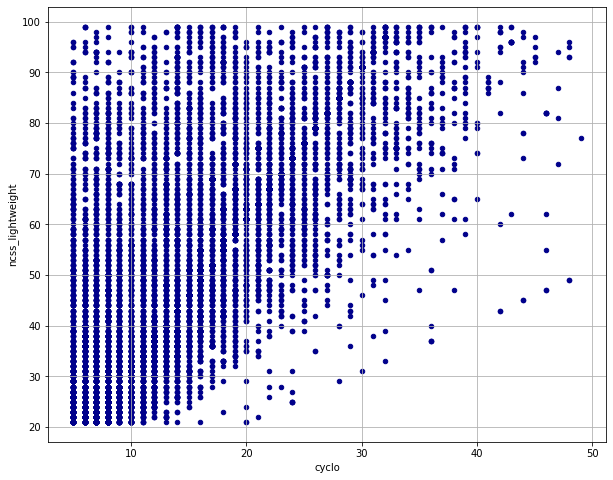

In [86]:
df.plot.scatter(x='cyclo', y='ncss_lightweight', c='DarkBlue', figsize=(10,8), grid=True)

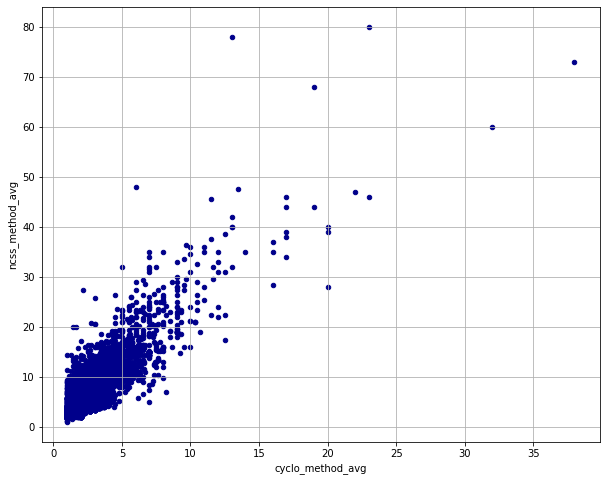

In [168]:
df.plot.scatter(x='cyclo_method_avg', y='ncss_method_avg', c='DarkBlue', figsize=(10,8), grid=True)

In [0]:
indices = X.index.values.tolist()
perm = permutations(indices, 2)

In [0]:
matrix = []
def to_bool(s):
    return 1 if s else 0

# Find the number of permutations which is the closest to the input data

In [0]:
def calc_closest_dataset_size_using_permutation(dataset_size):
  # since we have n*(n-1) options, we can sqrt and find the closest number
  return int(math.sqrt(dataset_size))

Some tests for the mentioned function

In [90]:
calc_closest_dataset_size_using_permutation(2)

1

In [97]:
calc_closest_dataset_size_using_permutation(3), calc_closest_dataset_size_using_permutation(10), calc_closest_dataset_size_using_permutation(40), calc_closest_dataset_size_using_permutation(7945), calc_closest_dataset_size_using_permutation(498000), calc_closest_dataset_size_using_permutation(54515)

(1, 3, 6, 89, 705, 233)

In [0]:
# REPLACE WITH PERMUTATIONS! 

In [99]:
print(scipy.special.perm(1, 2), scipy.special.perm(2, 2), scipy.special.perm(3, 2))
# print(perm(4, 2), perm(5, 2), perm(6, 2), perm(7, 2))
# print(perm(88, 2), perm(89, 2) , perm(90, 2))
# print(perm(705, 2), perm(706, 2), perm(707, 2))
# print(perm(232, 2), perm(233, 2), perm(234, 2))

0.0 2.0 6.0


In [0]:
def generate_full_permutations_dataset(d, desired_dataset_size, filename="out.csv"):
  indices = []
  real_patterns_number = calc_closest_dataset_size_using_permutation(desired_dataset_size)
  print('You set {} values for dataset, but since we have permutations, we will get only dataset with {} size due to pairwise comparison between each pattern'.format(desired_dataset_size, real_patterns_number))
  random_indices = random.sample(d.index.tolist(), real_patterns_number)
  # print(random_indices)
  perms = permutations(random_indices, 2)
  lst = list(perms)
  matrix = []
  for _, val in tqdm(enumerate(lst), total=len(lst)):
    # print(_)
    x, y = val[0], val[1]
    # print(x, y)
    # print(iter)
    left_patterns = d.loc[x, :].values.tolist()
    right_patterns = d.loc[y, :].values.tolist()
    row = left_patterns + right_patterns
    # print(row)
    target_left = df.loc[x, :]['cyclo']
    target_right = df.loc[y, :]['cyclo']
    target_cyclo = to_bool(target_left < target_right)
    matrix.append(row + [target_cyclo])
    # iter += 1
    import csv

  with open(filename, "w", newline="") as f:
      writer = csv.writer(f)
      writer.writerows(matrix)

In [101]:
generate_full_permutations_dataset(X, 10000)


  1%|          | 87/9900 [00:00<00:11, 863.14it/s]

You set 10000 values for dataset, but since we have permutations, we will get only dataset with 100 size due to pairwise comparison between each pattern



100%|██████████| 9900/9900 [00:10<00:00, 921.32it/s]


In [111]:
dataset = pd.read_csv('out.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,0,0,0,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,1,0,0,0,0
1,0,0,0,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,1
2,0,0,0,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,5,0,3,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,9,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,0,0,1,1
4,0,0,0,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0,0,1,1


CREATE DATASET

In [0]:
from sklearn.ensemble import RandomForestClassifier

def train(dataset):
  newd = dataset.drop_duplicates(keep=False)
  y = newd.iloc[:,-1]
  X = newd.iloc[:,:-1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  rfc=RandomForestClassifier(random_state=42)
  param_grid = { 
      'n_estimators': [200, 500],
      'max_features': ['auto', 'sqrt', 'log2'],
      'max_depth' : [4,5,6,7,8],
      'criterion' :['gini', 'entropy']
  }

  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
  CV_rfc.fit(X_train, y_train)
  print(CV_rfc.best_params_)
  print('Training best model')
  rfc1=RandomForestClassifier(**CV_rfc.best_params_)
  rfc1.fit(X_train, y_train)
  pred=rfc1.predict(X_test)
  from sklearn.metrics import accuracy_score, auc, f1_score, hamming_loss
  # print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test,pred))
  # print("f1_score for Random Forest on CV data: ", f1_score(y_test,pred))
  # print("hamming_loss for Random Forest on CV data: ", hamming_loss(y_test,pred))
  # print("auc for Random Forest on CV data: ", auc(y_test,pred))
  return  X_train, X_test, y_train, y_test, pred, rfc1

In [113]:
X_train, X_test, y_train, y_test, pred, rfc1 = train(dataset)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Training best model


In [115]:
  from sklearn.metrics import accuracy_score, auc, f1_score, hamming_loss
  print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test,pred))
  print("f1_score for Random Forest on CV data: ", f1_score(y_test,pred))
  print("hamming_loss for Random Forest on CV data: ", hamming_loss(y_test,pred))
  # print("auc for Random Forest on CV data: ", auc(y_test,pred))

Accuracy for Random Forest on CV data:  0.8166776968894772
f1_score for Random Forest on CV data:  0.7844357976653697
hamming_loss for Random Forest on CV data:  0.18332230311052283


In [0]:
from itertools import chain, tee

import networkx
import networkx.algorithms

# pairwise recipe from the itertools docs.
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

def merge_ordering(sublists):
    # Make an iterator of graph edges for the new graph. Some edges may be repeated.
    # That's fine. NetworkX will ignore duplicates.
    edges = chain.from_iterable(map(pairwise, sublists))
    graph = networkx.DiGraph(edges)
    networkx.draw(graph, with_labels=True, font_weight='bold')
    return list(networkx.algorithms.topological_sort(graph))

In [0]:
def test_input(arr, model):
  print("You must pass parameter in the following order: {}".format(COLUMNS_FEATURES))
  changed_arrs = []
  for i, item in enumerate(arr):
    # print(item)
    elem = arr[i]
    if elem <= 0:
      continue
    else:
      arr_new = arr.copy()
      arr_new[i] = arr[i] - 1
      changed_arrs.append([i, arr_new])
  
  orders = []
  print('Making graph for partial ordered list')
  print(changed_arrs)
  for elem1, elem2 in permutations(changed_arrs, 2):
    # elem is and list; the 1st elem is an index of pattern we've changed,the  2nd item is the array itself
    input_data = [elem1[1] + elem2[1]]
    # print(input_data)
    pred = model.predict(input_data)
    if pred == 1:
      # elem1 < elem2
      orders.append([elem1[0], elem2[0]])
    else:
      orders.append([elem2[0], elem1[0]])

  print(orders)
  return merge_ordering(orders)
  # lst = list(permutations(changed_arrs, 2))
  # print(lst[0])
  # print(changed_arrs)


In [147]:
test_val = df[ONLY_PATTERNS].loc[1, :].tolist()
test_val

[6, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1]

You must pass parameter in the following order: ['var_middle_number', 'this_find_number', 'string_concat_number', 'instance_of_number', 'method_chain_number', 'var_decl_diff_number_11', 'var_decl_diff_number_7', 'var_decl_diff_number_5', 'super_method_call_number', 'force_type_cast_number', 'entropy', 'halstead volume', 'ncss_lightweight', 'left_spaces_var', 'right_spaces_var', 'max_left_diff_spaces', 'max_right_diff_spaces', 'asserts_number', 'setter_number', 'empty_rethrow_number', 'prohibited_class_names_number', 'return_in_if_number', 'impl_multi_number', 'many_prim_ctors_number', 'multiple_try_number', 'non_final_field_number', 'null_check_number', 'part_sync_number', 'red_catch_number', 'return_null_number']
Making graph for partial ordered list
[[0, [5, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1]], [2, [6, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1]], [6, [6, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1]], [7, [6, 0

NetworkXUnfeasible: ignored

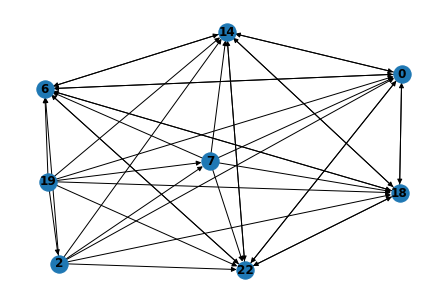

In [165]:
test_input(test_val, rfc1)

# Large DATASET without metrics

In [0]:
scale_ncss=False
scale=False
# import and initialize dataset
df = pd.read_csv('dataset8.csv')
df = df.dropna().drop_duplicates(subset=df.columns.difference(['filename']))
df = df[(df.ncss_lightweight > 20) & (df.ncss_lightweight < 100) & (df.npath_method_avg < 100000.00) & (df.cyclo < 50) & (df.cyclo > 4)].copy().reset_index()
df.rename(columns = {'for_type_cast_number':'force_type_cast_number'}, inplace = True) 
df = df[~df["filename"].str.lower().str.contains("test")]
filename_with_index = df['filename']
df.drop('filename', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)
Y_m = df[['cyclo']].copy().values
if scale_ncss:
    new = pd.DataFrame(df[ONLY_PATTERNS].values / df['ncss_lightweight'].values.reshape((-1, 1)))
else:
    new = df[ONLY_PATTERNS].copy()
if scale:
  X_m = pd.DataFrame(StandardScaler().fit_transform(new.values), columns=new.columns, index=new.index).values
else:
  X_m = new

In [174]:
generate_full_permutations_dataset(X_m, 500000, filename='out_m.csv')


  0%|          | 82/499142 [00:00<10:09, 819.40it/s]

You set 500000 values for dataset, but since we have permutations, we will get only dataset with 707 size due to pairwise comparison between each pattern


Streaming output truncated to the last 5000 lines.
100%|██████████| 499142/499142 [08:47<00:00, 945.72it/s]


In [176]:
dataset1 = pd.read_csv('out_m.csv', header=None)
dataset1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,5,0,0,0,2,2,3,6,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
1,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0
2,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,3,0,2,0,1,2,1,0,0,0,0,0,1,0,0,0,1,2,0,0,0,0
3,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,3,0,0,0,0,0
4,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,4,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0


In [177]:
X_train1, X_test1, y_train1, y_test1, pred1, rfc_m = train(dataset)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Training best model


In [179]:
  from sklearn.metrics import accuracy_score, auc, f1_score, hamming_loss
  print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test1,pred1))
  print("f1_score for Random Forest on CV data: ", f1_score(y_test1,pred1))
  print("hamming_loss for Random Forest on CV data: ", hamming_loss(y_test1,pred1))

Accuracy for Random Forest on CV data:  0.7809397749834547
f1_score for Random Forest on CV data:  0.7440061871616396
hamming_loss for Random Forest on CV data:  0.21906022501654535


# DATASET with metrics

In [0]:
scale_ncss=False
scale=False
# import and initialize dataset
df = pd.read_csv('dataset8.csv')
df = df.dropna().drop_duplicates(subset=df.columns.difference(['filename']))
df = df[(df.ncss_lightweight > 20) & (df.ncss_lightweight < 100) & (df.npath_method_avg < 100000.00) & (df.cyclo < 50) & (df.cyclo > 4)].copy().reset_index()
df.rename(columns = {'for_type_cast_number':'force_type_cast_number'}, inplace = True) 
df = df[~df["filename"].str.lower().str.contains("test")]
filename_with_index = df['filename']
df.drop('filename', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)
Y_metrics = df[['cyclo']].copy().values
if scale_ncss:
    new = pd.DataFrame(df[COLUMNS_FEATURES].values / df['ncss_lightweight'].values.reshape((-1, 1)))
else:
    new = df[COLUMNS_FEATURES].copy()
if scale:
  X_metrics = pd.DataFrame(StandardScaler().fit_transform(new.values), columns=new.columns, index=new.index).values
else:
  X_metrics = new

In [181]:
generate_full_permutations_dataset(X_m, 10000, filename='out_metrics.csv')


  1%|          | 81/9900 [00:00<00:12, 806.21it/s]

You set 10000 values for dataset, but since we have permutations, we will get only dataset with 100 size due to pairwise comparison between each pattern



100%|██████████| 9900/9900 [00:10<00:00, 925.98it/s]


In [0]:
out_metrics = pd.read_csv('out.csv')

In [0]:
X_train0, X_test0, y_train0, y_test0, pred0, rfc_m0 = train(dataset)

In [187]:
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt

parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

d_temp = out_metrics.drop_duplicates(keep=False)
y2 = d_temp.iloc[:,-1]
X2 = d_temp.iloc[:,:-1]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf_svm = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf_svm.fit(X_train2, y_train2)
print(clf_svm.best_params_) 

KeyboardInterrupt: ignored

In [0]:
class AibolitDataset(torch.utils.data.Dataset):
    def __init__(self):
        newd = pd.read_csv('out_metrics.csv', header=None)
        self.Y = [[x] for x in newd.iloc[:,-1].values.astype('double', copy=False).tolist()]
        self._columns = COLUMNS_FEATURES
        self.X = newd.iloc[:,:-1].values.astype('double', copy=False)

    def __getitem__(self, idx):
        # get item by index
        return torch.FloatTensor(self.X[idx]), torch.FloatTensor(self.Y[idx])
  
    def __len__(self):
        # returns length of data
        return len(self.X)
    
    def shape(self):
        # returns length of data
        return self.X.shape
  
    @property
    def columns(self):
        """Columns property."""
        return self._columns

In [0]:
# newd = pd.read_csv('out.csv', header=None)
yy = [[x] for x in newd.iloc[:,-1].values.astype('double', copy=False).tolist()]
# zz = newd.iloc[:,:-1].values.astype('double', copy=False)
yy

In [297]:
dataset = AibolitDataset()
print('dataset length:', dataset.shape())
len(dataset)
dataset[0]
dataset.Y[0], torch.FloatTensor(dataset.X[0])

dataset length: (9900, 46)


([1.0],
 tensor([0., 0., 1., 1., 1., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 1.,
         1., 3., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 4., 5., 0., 0., 1.]))

In [317]:
dataset.X.shape

(9900, 46)

In [0]:
def prepare_data(dataset): 
  batch_size = 100
  train_size = int(0.7*len(dataset))
  val_size = len(dataset) - train_size
  train_data, val_data = torch.utils.data.random_split(dataset,[train_size, val_size])
  #print(len(train_data), len(val_data))
  trainloader = torch.utils.data.DataLoader(
      train_data, batch_size=batch_size,
      shuffle=True)
  testloader = torch.utils.data.DataLoader(
      val_data, batch_size=batch_size,
      shuffle=False)
  return trainloader, testloader, train_data, val_data

def prepare_data2(train_data, val_data): 
  batch_size = 100
  trainloader = torch.utils.data.DataLoader(
      train_data, batch_size=batch_size,
      shuffle=True)
  testloader = torch.utils.data.DataLoader(
      val_data, batch_size=batch_size,
      shuffle=False)
  return trainloader, testloader, train_data, val_data


In [0]:
class Maxout(nn.Module):

    def __init__(self, d_in, d_out, pool_size):
        super().__init__()
        self.d_in, self.d_out, self.pool_size = d_in, d_out, pool_size
        self.lin = nn.Linear(d_in, d_out * pool_size)


    def forward(self, inputs):
        shape = list(inputs.size())
        shape[-1] = self.d_out
        shape.append(self.pool_size)
        max_dim = len(shape) - 1
        out = self.lin(inputs)
        m, i = out.view(*shape).max(max_dim)
        return m

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(46, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        

    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)


In [0]:
def validate(model, dl, device=None):
    model.eval()
    test_loss = 0
    accuracy = 0
    preds = []
    all_labels = []
    criterion = torch.nn.MSELoss(reduction='none')
    losses = []

    with torch.no_grad():
        for inputs, labels in dl:
            #inputs, labels = inputs.to(device), labels.to(device)
            pred = model.forward(inputs)
            print(labels, pred)
            batch_loss = criterion(pred.squeeze(1), labels.squeeze(1))
            all_labels += labels.tolist()
            preds += pred.tolist()
            losses += batch_loss.tolist()
          
    avg_loss = np.mean(losses)
    r2 = r2_score(all_labels, preds)
    mae = mean_absolute_error(all_labels, preds) # MAE output is non-negative floating point. The best value is 0.0.
    y_true, y_pred = np.array(all_labels), np.array(preds)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true.reshape(-1), y_pred.reshape(-1)) #np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mse = mean_squared_error(y_true, y_pred) 

    return r2, avg_loss, mape, mae, mse

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# validate(model, testloader, device)

In [0]:
def check_early_stoppping(early_stoping: int, score_history, epoch):
  if (len(score_history) == 0): return False
  not_improve_counter = 0
  best = score_history[0]
  for i in range(0, epoch):
    if score_history[i] < best:
      not_improve_counter = 0
      best = score_history[i]
    else:
      not_improve_counter += 1

    if not_improve_counter >= early_stoping:
      return True
  return False

In [0]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
stats = []
dataset = AibolitDataset()
trainloader, testloader, train_data, val_data = prepare_data(dataset)
EPOCHS = 100
model = Net()
model.to(device)
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001
print(device)

for i in range(EPOCHS+1):
  model.train()
  for e in range(1, EPOCHS+1):
      epoch_loss = 0
      epoch_acc = 0
      for X_batch, y_batch in trainloader:
          X_batch, y_batch = X_batch.to(device), y_batch.to(device)
          optimizer.zero_grad()
          
          y_pred = model(X_batch)
          print(y_batch)
          loss = criterion(y_pred, y_batch.unsqueeze(1))
          acc = binary_acc(y_pred, y_batch.unsqueeze(1))
          
          loss.backward()
          optimizer.step()
          
          epoch_loss += loss.item()
          epoch_acc += acc.item()
          

      print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

In [0]:
print('Training best model')
clf_svm1=svm.SVC(**clf_svm.best_params_)
clf_svm1.fit(X_train, y_train)
pred=clf_svm1.predict(X_test)